##  Introduction


## Table of Contents
        
1. Data Description
2. Data Preparation <br>
&nbsp;&nbsp;&nbsp;2.1. Data Cleaning <br>
&nbsp;&nbsp;&nbsp;2.2. Data Transformation <br>
&nbsp;&nbsp;&nbsp;2.3. Data Analysis <br>
&nbsp;&nbsp;&nbsp;2.4. Data Visualization <br>
3. Model Building <br>
&nbsp;&nbsp;&nbsp;3.1. Model Selection <br>
&nbsp;&nbsp;&nbsp;3.2. Model Training <br>
&nbsp;&nbsp;&nbsp;3.3. Model Evaluation <br>
4. Model Deployment <br>
5. Conclusion <br>

## 1. Data Description

- Collected from 130 hospitals in the U.S. during 10 years(1999-2008)
- Contains 101,766 observations and 50 features
- Description and values of the features can be found in Research Article
- The following table shows a quick overview of the features' name and types
image.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [203]:
# Load dataset
pd.options.display.max_columns = None
df = pd.read_csv('/Users/mady/Library/Mobile Documents/com~apple~CloudDocs/DS project/readmission-prediction/data/diabetic_data.csv')
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [204]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 101766 │ │ string      │ 37    │                                                          │
│ │ Number of columns │ 50     │ │ int64       │ 13    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃          ┃           ┃       ┃          ┃          ┃           ┃          ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean     ┃ sd        ┃ p0    ┃ p25      ┃ p50      ┃ p75       ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ encounter │  0 │    0 │ 16520000 │ 102600000 │ 12520 │ 84960000 │ 15240000 │ 230300000 │ 44390000 │ ▆▇▇▅▂▂ │  │
│ │ _id       │    │      │        0 │           │       │          │        0 │           │        0 │        │  │
│ │ patient_n │  0 │    0 │ 54330000 │  38700000 │   135 │ 23410000 │ 45510000 │  87550000 │ 18950000 │  ▇▅▅▃  │  │
│ │ br        │    │      │          │           │       │          │          │           │        0 │        │  │
│ │ admission │  0 │    0 │    2.024 │     1.445 │     1 │        1 │        1 │         3 │        8 │ ▇▂ ▁▁  │  │
│ │ _type_id  │    │      │          │           │       │          │          │           │          │        │  │
│ │ discharge │  0 │    0 │    3.716 │      5.28 │     1 │        1 │        1 │         4 │       28 │   ▇▁   │  │
│ │ _disposit │    │      │          │           │       │          │          │           │          │        │  │
│ │ ion_id    │    │      │          │           │       │          │          │           │          │        │  │
│ │ admission │  0 │    0 │    5.754 │     4.064 │     1 │        1 │        7 │         7 │       25 │ ▅▇  ▁  │  │
│ │ _source_i │    │      │          │           │       │          │          │           │          │        │  │
│ │ d         │    │      │          │           │       │          │          │           │          │        │  │
│ │ time_in_h │  0 │    0 │    4.396 │     2.985 │     1 │        2 │        4 │         6 │       14 │ ▇▃▂▁▁▁ │  │
│ │ ospital   │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_lab_p │  0 │    0 │     43.1 │     19.67 │     1 │       31 │       44 │        57 │      132 │  ▃▇▇▂  │  │
│ │ rocedures │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_proce │  0 │    0 │     1.34 │     1.706 │     0 │        0 │        1 │         2 │        6 │ ▇▃▂▂▁▁ │  │
│ │ dures     │    │      │          │           │       │          │          │           │          │        │  │
│ │ num_medic │  0 │    0 │    16.02 │     8.128 │     1 │       10 │       15 │        20 │       81 │  ▇▇▁   │  │
│ │ ations    │    │      │          │           │       │          │          │           │          │        │  │
│ │ number_ou │  0 │    0 │   0.3694 │     1.267 │     0 │        0 │        0 │         0 │       42 │   ▇    │  │
│ │ tpatient  │    │      │          │           │      

In [205]:
# Checking the number of rows and columns in the dataset
df.shape

(101766, 50)

In [206]:
# Display up to 20 unique values for each column
for col in df.columns:
    print(f"Column '{col}' has {df[col].nunique()} unique values")
    print(f"unique values: {df[col].unique()[:20]}")

Column 'encounter_id' has 101766 unique values
unique values: [2278392  149190   64410  500364   16680   35754   55842   63768   12522
   15738   28236   36900   40926   42570   62256   73578   77076   84222
   89682  148530]
Column 'patient_nbr' has 71518 unique values
unique values: [  8222157  55629189  86047875  82442376  42519267  82637451  84259809
 114882984  48330783  63555939  89869032  77391171  85504905  77586282
  49726791  86328819  92519352 108662661 107389323  69422211]
Column 'race' has 6 unique values
unique values: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Column 'gender' has 3 unique values
unique values: ['Female' 'Male' 'Unknown/Invalid']
Column 'age' has 10 unique values
unique values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Column 'weight' has 10 unique values
unique values: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Colum

## 2. Data Preparation
### 2.1. Data Cleaning

#### 2.1.1 Dealing with Missing Values

In [207]:
# Create a df showing percentage of missing values from each column
## Missing values are represented as NA, '?', 'Unknown/Invalid'
missing_values = df.isin(['NA', '?', 'Unknown/Invalid']).sum() / df.shape[0] * 100
missing_values.sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
gender                       0.002948
troglitazone                 0.000000
miglitol                     0.000000
encounter_id                 0.000000
acarbose                     0.000000
tolazamide                   0.000000
pioglitazone                 0.000000
tolbutamide                  0.000000
glyburide                    0.000000
rosiglitazone                0.000000
insulin                      0.000000
examide                      0.000000
citoglipton                  0.000000
acetohexamide                0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change      

__"examide"__ and __"citoglipton"__ are dropped because they only have one value, hence does not contribute to model prediction.

In [208]:
df.drop(columns=['examide', 'citoglipton'], inplace=True)

__"weight"__, __"medical_specialty"__ and __"payer_code"__ are missing 97%, 49% and 40% of the data, respectively. These columns are dropped because of the high percentage of missing values, hence poor interpretability and lack of predictive power.

In [209]:
# Drop Weight, Medical_Specialty and Payer_Code columns
df.drop(columns=['weight', 'medical_specialty', 'payer_code'], inplace=True)

Drop __"encounter_id"__ and keep __"patient_id"__ as it is a unique identifier for each patient that might have multiple encounters.

In [210]:
df.drop(columns=['encounter_id'], inplace=True)

__"diag_2"__ and __"diag_3"__ are dropped because we already have __"diag_1"__ which is the primary diagnosis.

In [211]:
df.drop(columns=['diag_2', 'diag_3'], inplace=True)

Then drop the row of small percentage of missing values in __"race"__, __"gender"__, and  __"diag_1"__.

In [212]:
# Replace '?', 'Unknown/Invalid' with NA
df.replace(['?', 'Unknown/Invalid'], np.nan, inplace=True)
# Drop rows with missing values in "diag_1"
df.dropna(subset=['diag_1', 'race', 'gender'], inplace=True)
# Check the number of rows after dropping
df.shape

(99473, 42)

#### 2.1.2 Dealing with duplicates

The dataset contained multiple inpatient visits for some patients and the observations could not be considered as statistically independent because that bias to patients with multiple encounters. Hence one encounter per patient; in particular, only the first encounter for each patient as the primary admission and determined whether or not they were readmitted within 30 days.

In [213]:
# Drop duplicates based on patient number, keeping only the first encounter
df.drop_duplicates(subset=['patient_nbr'], keep='first', inplace=True)
# Check the number of rows after dropping
df.shape

(69658, 42)

### 2.2 Data Categorization and Transformation


__"diag_1"__ has 717 unique values representing that are difficult to interpret. These values represent icd9 codes that can be mapped to 19 different categories based on this research paper.

In [214]:
icd9_to_category = {
    'Circulatory': [str(i) for i in range(390, 460)] + ['785'],
    'Respiratory': [str(i) for i in range(460, 520)] + ['786'],
    'Digestive': [str(i) for i in range(520, 580)] + ['787'],
    'Diabetes': ['250'],
    'Injury': [str(i) for i in range(800, 1000)],
    'Musculoskeletal': [str(i) for i in range(710, 740)],
    'Genitourinary': [str(i) for i in range(580, 630)] + ['788'],
    'Neoplasms': [str(i) for i in range(140, 240)],
    'Other': ['780', '781', '784'] + [str(i) for i in range(790, 800)] + 
             [str(i) for i in range(240, 280) if i != 250] + ['782'] + 
             [str(i) for i in range(1, 140)] + [str(i) for i in range(290, 320)] + 
             ['E', 'V'] + [str(i) for i in range(280, 290)] + [str(i) for i in range(320, 360)] + 
             [str(i) for i in range(630, 680)] + [str(i) for i in range(360, 390)] + 
             [str(i) for i in range(740, 760)]
}

# Function to map ICD-9 code to category
def map_icd9_to_category(icd9_code):
    if pd.isna(icd9_code):
        return 'Unknown'
    for category, codes in icd9_to_category.items():
        if any(icd9_code.startswith(code) for code in codes):
            return category
    return 'Unknown'

# Apply the function to the "diag_1" column
df['diagnosis'] = df['diag_1'].apply(map_icd9_to_category)

# Check the result
print(df['diagnosis'].value_counts())

diagnosis
Circulatory        21325
Other              11994
Respiratory         9536
Digestive           6422
Diabetes            5656
Injury              4648
Musculoskeletal     3962
Genitourinary       3443
Neoplasms           2672
Name: count, dtype: int64


__"admission_type_id"__, __"discharge_disposition_id"__, __"admission_source_id"__ are categories and not numerical values.

In [215]:
#for col in ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']:
 #   df[col] = df[col].astype('category')
  #  df[col] = df[col].cat.codes

All the columns with object type are also categorical.

In [216]:
# Change all the object type columns to category type
#for col in df.columns:
 #   if df[col].dtype == 'object':
  #      df[col] = df[col].astype('category')
   #     df[col] = df[col].cat.codes
        
# Create hierarchy for age
#age_hierarchy = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']


- Age <br>
Create age as numerical value rather than categorical buy using median of each bin

In [217]:
# Convert age to numerical value using the median of each bin
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age'] = df['age'].map(age_mapping)

- Outcome Variable <br>
The outcome variable indicates whether a patient is readmitted to the hospital within 30 days. Originally categorized as < 30, > 30, and No Readmission, it was simplified to a binary classification. Given the primary interest in factors leading to early readmission, the outcome is defined with two values: 1 for patients readmitted within 30 days of discharge, and 0 encompassing both readmission after 30 days and no readmission.

In [218]:
df['readmitted'] = df['readmitted'].map({'<30': 1, '>30': 0, 'NO': 0})

In [219]:
df['readmitted'].value_counts()

readmitted
0    63493
1     6165
Name: count, dtype: int64

Several features with numerous unique values will be consolidated into broader categories 
to reduce complexity and improve model interpretability.

In [220]:
# Indentify features with many unique values
for col in df.columns:
    if df[col].nunique() > 10:
        print(f"Column '{col}' has {df[col].nunique()} unique values")
        print(f"unique values: {df[col].unique()[:20]}")

Column 'patient_nbr' has 69658 unique values
unique values: [  8222157  55629189  86047875  82442376  42519267  82637451  84259809
 114882984  48330783  63555939  89869032  77391171  85504905  77586282
  49726791  86328819  92519352 108662661 107389323  63000108]
Column 'discharge_disposition_id' has 26 unique values
unique values: [25  1  3  6  2  5 11  7 10 14  4 18  8 12 13 17 16 22 23  9]
Column 'admission_source_id' has 17 unique values
unique values: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Column 'time_in_hospital' has 14 unique values
unique values: [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]
Column 'num_lab_procedures' has 116 unique values
unique values: [41 59 11 44 51 31 70 73 68 33 47 62 60 55 49 75 45 29 35 42]
Column 'num_medications' has 75 unique values
unique values: [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22]
Column 'number_outpatient' has 33 unique values
unique values: [ 0  2  1  5  7  3  8  4 12  9 11  6 20 15 10 13 14 16 21 35]
Colum

- Admission type <br>
Admission type can be collapsed to 5 categories: Emergency, Urgent, Elective, Newborn, Other

admission_type
Emergency    48102
Elective     13606
Other         7941
Newborn          9
Name: count, dtype: int64


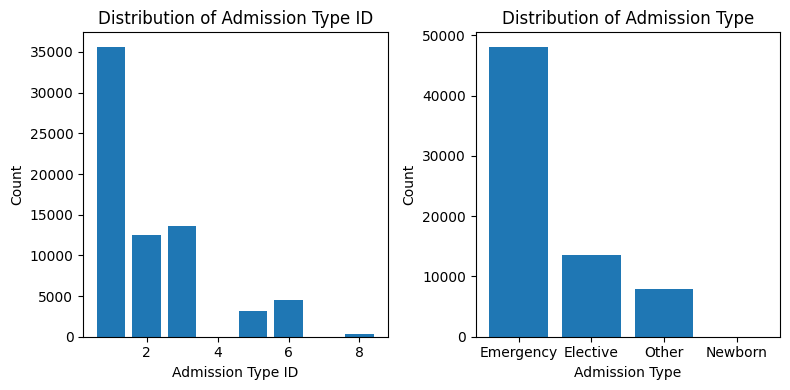

In [221]:
# Create a mapping dictionary
admission_type_mapping = {
    1: 'Emergency',
    2: 'Emergency',
    3: 'Elective',
    4: 'Newborn',
    5: 'Other',
    6: 'Other',
    7: 'Emergency',
    8: 'Other'
}

# Create a new column 'admission_type' with the mapped values
df['admission_type'] = df['admission_type_id'].map(admission_type_mapping)

# Check the result
print(df['admission_type'].value_counts())

# Create two charts of admission_type count and admission_type_id count
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.bar(df['admission_type_id'].value_counts().index, df['admission_type_id'].value_counts())
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Distribution of Admission Type ID')

plt.subplot(1, 2, 2)
plt.bar(df['admission_type'].value_counts().index, df['admission_type'].value_counts())
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Distribution of Admission Type')

plt.tight_layout()
plt.show()

- Discharge Disposition <br>
Discharge disposition has 29 categories that can be collapsed into 3 categories: Home, Transferred, Other. Among the 29 categories, 6 categories are related to death or hospice care, which are not considered as readmitted patients, hence are excluded.

discharge_disposition
Home        51279
Transfer    13229
Other        3634
Name: count, dtype: int64
68142


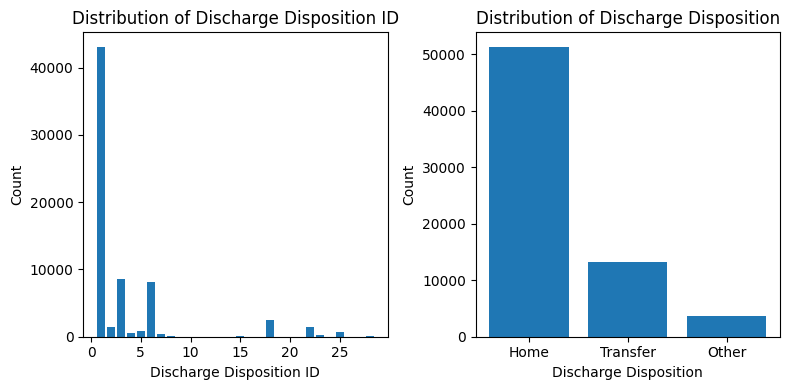

In [222]:
# Remove categories related to death or hospice care
df = df[~df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]

# Create a mapping dictionary
discharge_disposition_mapping = {
    1: 'Home',
    2: 'Transfer',
    3: 'Transfer',
    4: 'Transfer',
    5: 'Transfer',
    6: 'Home',
    7: 'Other',
    8: 'Home',
    9: 'Other',
    10: 'Other',
    12: 'Other',
    15: 'Transfer',
    16: 'Transfer',
    17: 'Transfer',
    18: 'Other',
    22: 'Transfer',
    23: 'Transfer',
    24: 'Transfer',
    25: 'Other',
    26: 'Other',
    27: 'Transfer',
    28: 'Transfer',
    29: 'Transfer',
    30: 'Transfer'
}

# Create a new column 'discharge_disposition' with the mapped values
df['discharge_disposition'] = df['discharge_disposition_id'].map(discharge_disposition_mapping)
# Check the result
print(df['discharge_disposition'].value_counts())
print(df['discharge_disposition'].value_counts().sum())

# Create a bar plot side by side of discharge_disposition_id and discharge_disposition
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(df['discharge_disposition_id'].value_counts().index, df['discharge_disposition_id'].value_counts())
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.title('Distribution of Discharge Disposition ID')

plt.subplot(1, 2, 2)
plt.bar(df['discharge_disposition'].value_counts().index, df['discharge_disposition'].value_counts())
plt.xlabel('Discharge Disposition')
plt.ylabel('Count')
plt.title('Distribution of Discharge Disposition')
plt.tight_layout()
plt.show()

- Admission source <br>
Admission source has 26 categories that can be collapsed to 4 categories: Referral, Emergency, Transfer, Other,

admission_source
Emergency    36606
Referral     22128
Other         4961
Transfer      4447
Name: count, dtype: int64
68142


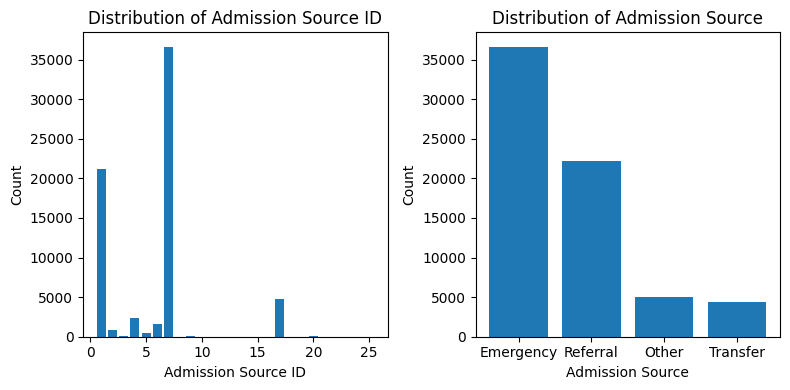

In [223]:
admission_source_mapping = {
    1: 'Referral',        # Physician Referral
    2: 'Referral',        # Clinic Referral
    3: 'Referral',        # HMO Referral
    4: 'Transfer',        # Transfer from a hospital
    5: 'Transfer',        # Transfer from a Skilled Nursing Facility (SNF)
    6: 'Transfer',        # Transfer from another health care facility
    7: 'Emergency',       # Emergency Room
    8: 'Other',           # Court/Law Enforcement
    9: 'Other',           # Not Available
    10: 'Transfer',       # Transfer from critical access hospital
    11: 'Other',          # Normal Delivery
    12: 'Other',          # Premature Delivery
    13: 'Other',          # Sick Baby
    14: 'Other',          # Extramural Birth
    15: 'Other',          # Not Available
    17: 'Other',          # NULL
    18: 'Transfer',       # Transfer From Another Home Health Agency
    19: 'Other',          # Readmission to Same Home Health Agency
    20: 'Other',          # Not Mapped
    21: 'Other',          # Unknown/Invalid
    22: 'Transfer',       # Transfer from hospital inpatient/same facility result in a separate claim
    23: 'Other',          # Born inside this hospital
    24: 'Other',          # Born outside this hospital
    25: 'Transfer',       # Transfer from Ambulatory Surgery Center
    26: 'Transfer'        # Transfer from Hospice
}

df['admission_source'] = df['admission_source_id'].map(admission_source_mapping)

# Check the result
print(df['admission_source'].value_counts())
print(df['admission_source'].value_counts().sum())

# Create a bar plot side by side of admission_source_id and admission_source
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(df['admission_source_id'].value_counts().index, df['admission_source_id'].value_counts())
plt.xlabel('Admission Source ID')
plt.ylabel('Count')
plt.title('Distribution of Admission Source ID')

plt.subplot(1, 2, 2)
plt.bar(df['admission_source'].value_counts().index, df['admission_source'].value_counts())
plt.xlabel('Admission Source')
plt.ylabel('Count')
plt.title('Distribution of Admission Source')
plt.tight_layout()
plt.show()

- Hemoglobin A1C (A1Cresult) <br>
A1C result indicates performance of diabetes care. We put the results into 3 categories: (1) no HbA1c test performed, (2) HbA1c performed and in normal range, (3) HbA1c performed and the result is not in normal range.

In [224]:
# Create a mapping dictionary

a1c_mapping = {
    'Norm': 'Normal',
    '>7': 'Abnormal',
    '>8': 'Abnormal'
}

# Apply the mapping to the 'A1Cresult' column
df['HbA1C'] = df['A1Cresult'].map(a1c_mapping)
df['HbA1C'] = df['HbA1C'].fillna('None')

# Check the result

print(df['HbA1C'].value_counts())

HbA1C
None        55664
Abnormal     8805
Normal       3673
Name: count, dtype: int64


- Glucose serum (max_glu_serum)
Glucose serum also indicates performance of diabetes care. We create 3 categories: (1) no glucose test performed, (2) glucose test performed and in normal range, (3) glucose test performed and the result is not in normal range.

In [225]:
# Create a mapping dictionary for max_glu_serum
max_glu_serum_mapping = {
    'Norm': "Normal",
    '>200': "Abnormal",
    '>300': "Abnormal"
}

# Apply the mapping to the 'max_glu_serum' column
df['glucose_serum'] = df['max_glu_serum'].map(max_glu_serum_mapping)
df['glucose_serum'] = df['glucose_serum'].fillna('None')

# Check the result
print(df['glucose_serum'].value_counts())
print(df['glucose_serum'].value_counts().sum())

glucose_serum
None        64835
Normal       1681
Abnormal     1626
Name: count, dtype: int64
68142


### 2.3 Dealing with outliers

First of all, we need to check the distribution of the numerical features.

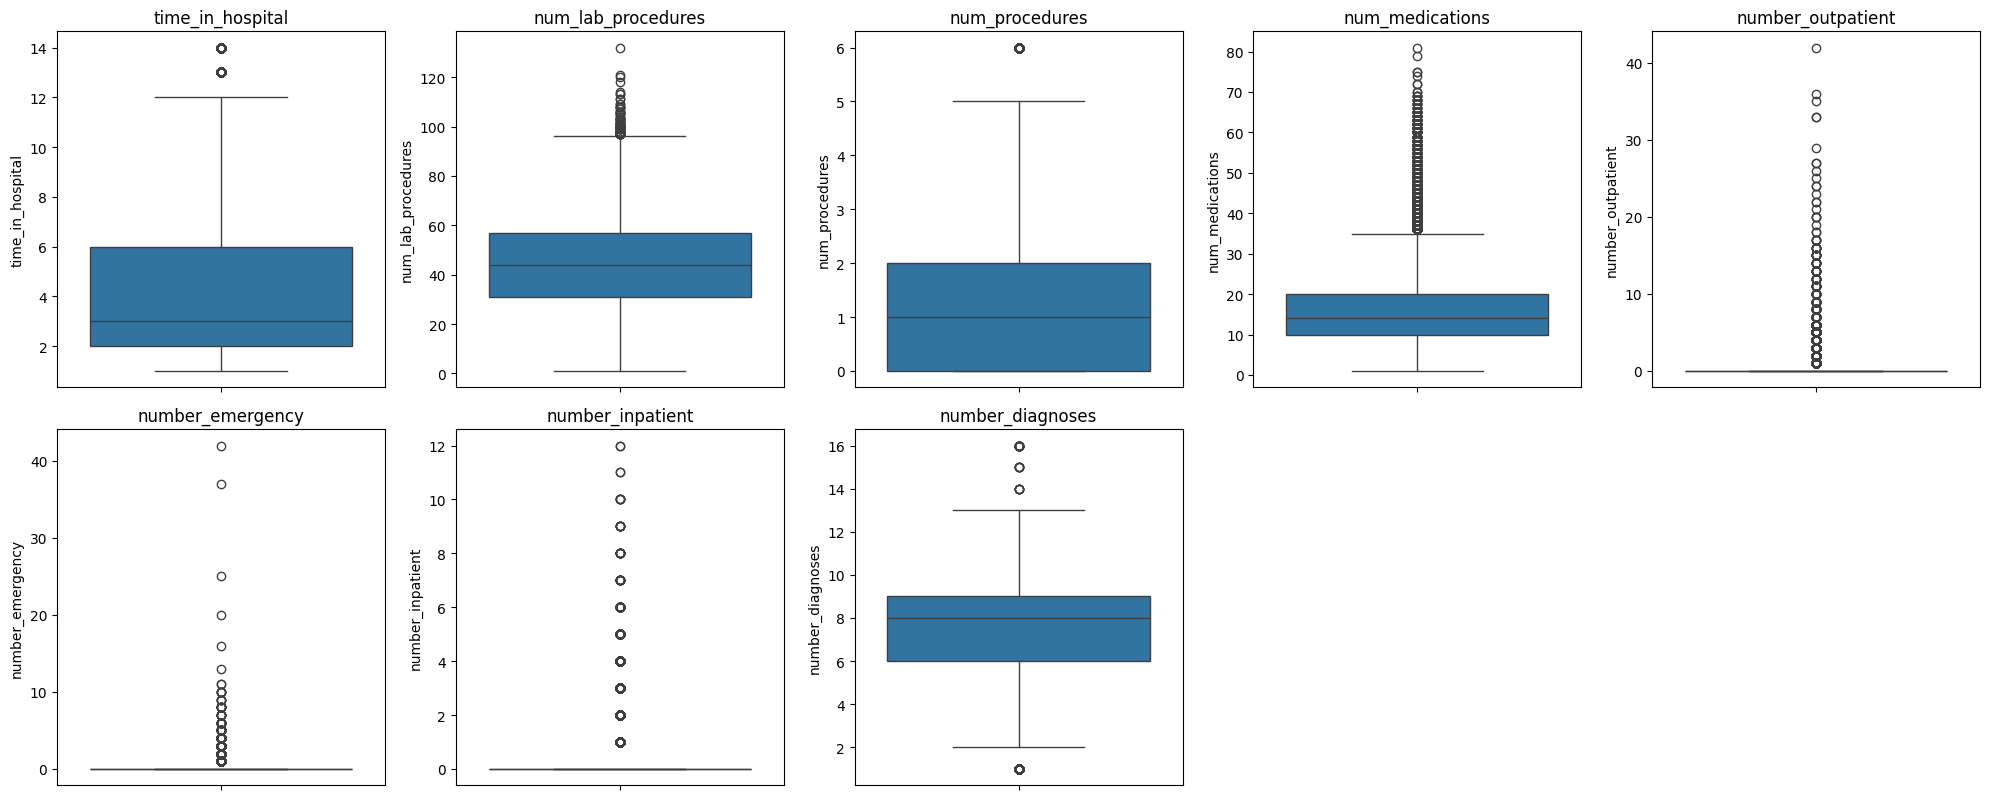

In [226]:
# Create a box plots for all the numerical features in the dataset
# Select numerical features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient', 'number_emergency',
                      'number_inpatient', 'number_diagnoses']

# Create box plots for all numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


In [227]:
# Create a dataframe to calculate skewness and kurtosis of each of the numerical features 
num_stats_df = pd.DataFrame()
skew_after = []
skew_before = []
kurtosis_after = []
kurtosis_before = []
std_after = []
std_before = []
log_transformation = []

num_stats_df['feature'] = numerical_features

for feature in numerical_features:
    skewval = df[feature].skew()
    skew_before.append(skewval)
    kurtosisval = df[feature].kurtosis()
    kurtosis_before.append(kurtosisval)
    stdval = df[feature].std()
    std_before.append(stdval)
    
    if (abs(skewval) > 2) & (abs(kurtosisval) > 2):
        log_transformation.append(True)
    
        skewvalnew = np.log(df[feature] + 1).skew()
        kurtosisvalnew = np.log(df[feature] + 1).kurtosis()
        stdvalnew = np.log(df[feature] + 1).std()
        
    else:
        log_transformation.append(False)
        skewvalnew = skewval
        kurtosisvalnew = kurtosisval
        stdvalnew = stdval
    
    skew_after.append(skewvalnew)
    kurtosis_after.append(kurtosisvalnew)
    std_after.append(stdvalnew)
        
num_stats_df['skew_before'] = skew_before
num_stats_df['kurtosis_before'] = kurtosis_before
num_stats_df['std_before'] = std_before
num_stats_df['log_transformation'] = log_transformation
num_stats_df['skew_after'] = skew_after
num_stats_df['kurtosis_after'] = kurtosis_after
num_stats_df['std_after'] = std_after
    
num_stats_df.sort_values(by='skew_after', ascending=False)

,feature,skew_before,kurtosis_before,std_before,log_transformation,skew_after,kurtosis_after,std_after
5,number_emergency,21.098262,1190.317376,0.517257,True,4.224646,21.081344,0.231186
4,number_outpatient,9.658697,183.096370,1.073453,True,3.133398,10.515382,0.381816
6,number_inpatient,5.533038,46.436136,0.606541,True,3.099924,9.962189,0.298392
3,num_medications,1.431455,3.850686,8.276547,False,1.431455,3.850686,8.276547
2,num_procedures,1.226011,0.561290,1.754730,False,1.226011,0.561290,1.754730
0,time_in_hospital,1.178123,1.007748,2.934366,False,1.178123,1.007748,2.934366
1,num_lab_procedures,-0.217611,-0.302840,19.921679,False,-0.217611,-0.302840,19.921679
7,number_diagnoses,-0.747623,-0.350673,1.995511,False,-0.747623,-0.350673,1.995511


In [228]:
# Perform log transformation for log_transformation == True
df['number_emergency_log'] = df['number_emergency'].apply(lambda x: np.log(x + 1))
df['number_inpatient_log'] = df['number_inpatient'].apply(lambda x: np.log(x + 1))
df['number_outpatient_log'] = df['number_outpatient'].apply(lambda x: np.log(x + 1))

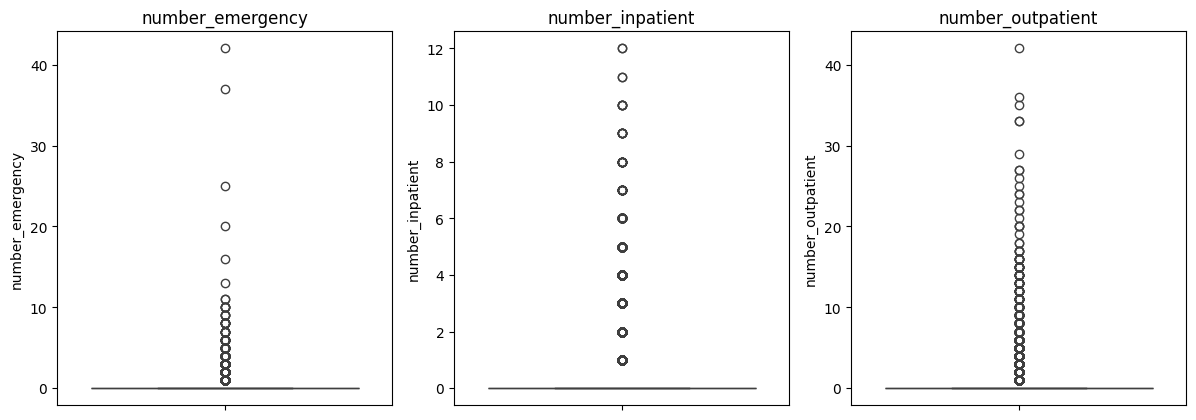

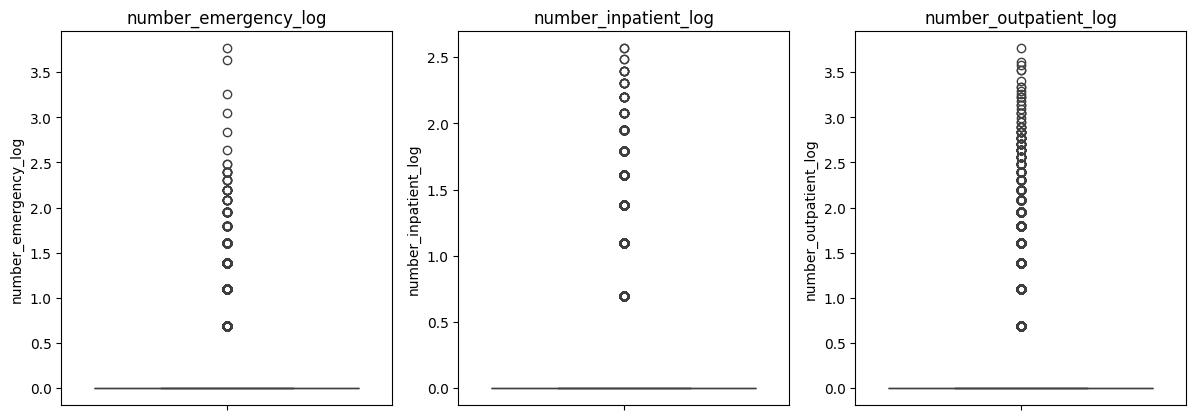

In [229]:
# Create new box plots for the numerical features after log transformation
numerical_features_before_log = ['number_emergency', 'number_inpatient', 'number_outpatient']
numerical_features_log = ['number_emergency_log', 'number_inpatient_log', 'number_outpatient_log']

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features_before_log):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features_log):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


### 2.4 Feature Engineering

- Number of Medication Changes (num_med_changes) <br>

    - Dataset includes 23 features representing changes in different medications during a patient's hospital stay.
    - Research suggests medication changes for diabetics upon admission may reduce readmission rates.
    - We created a new feature counting total medication changes per patient.

In [230]:
medication_features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone', 'metformin-pioglitazone']

# Calculate the number of medication changes for each of the feature
for col in medication_features:
    colname = str(col) + '_change'
    df[colname] = df[col].apply(lambda x: 0 if x == 'No' or x == 'Steady' else 1)

df['num_med_changes'] = 0
for col in medication_features:
    colname = str(col) + '_change'
    df['num_med_changes'] += df[colname]
    del df[colname]

# Check the result
print(df['num_med_changes'].value_counts())

num_med_changes
0    51320
1    15842
2      904
3       73
4        3
Name: count, dtype: int64


In [231]:
df.head(10)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis,admission_type,discharge_disposition,admission_source,HbA1C,glucose_serum,number_emergency_log,number_inpatient_log,number_outpatient_log,num_med_changes
0,8222157,Caucasian,Female,5,6,25,1,1,41,0,1,0,0,0,250.83,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Diabetes,Other,Other,Referral,None,None,0.0,0.000000,0.000000,0
1,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,276,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,Other,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,1
2,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,648,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Other,Emergency,Home,Emergency,None,None,0.0,0.693147,1.098612,0
3,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,8,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,Other,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,1
4,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,197,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Neoplasms,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,0
5,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,414,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,Circulatory,Emergency,Home,Referral,None,None,0.0,0.000000,0.000000,0
6,84259809,Caucasian,Male,65,3,1,2,4,70,1,21,0,0,0,414,7,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Circulatory,Elective,Home,Referral,None,None,0.0,0.000000,0.000000,0
7,114882984,Caucasian,Male,75,1,1,7,5,73,0,12,0,0,0,428,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Circulatory,Emergency,Home,Emergency,None,None,0.0,0.000000,0.000000,0
8,48330783,Caucasian,Female,85,2,1,4,13,68,2,28,0,0,0,398,8,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Circulatory,Emergency,Home,Transfer,None,None,0.0,0.000000,0.000000,0
9,63555939,Caucasian,Female,95,3,3,4,12,33,3,18,0,0,0,434,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Circulatory,Elective,Transfer,Transfer,None,None,0.0,0.000000,0.000000,0


### 3. Data Visualization

- Distribution of readmission

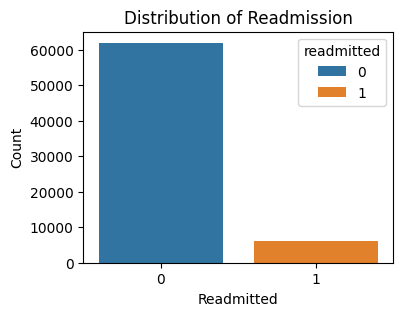

In [232]:
# Plot distribution of readmission and no
plt.figure(figsize=(4, 3))
sns.countplot(x='readmitted', data=df, hue='readmitted')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Distribution of Readmission')
plt.show()

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68142 entries, 0 to 101765
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_nbr               68142 non-null  int64  
 1   race                      68142 non-null  object 
 2   gender                    68142 non-null  object 
 3   age                       68142 non-null  int64  
 4   admission_type_id         68142 non-null  int64  
 5   discharge_disposition_id  68142 non-null  int64  
 6   admission_source_id       68142 non-null  int64  
 7   time_in_hospital          68142 non-null  int64  
 8   num_lab_procedures        68142 non-null  int64  
 9   num_procedures            68142 non-null  int64  
 10  num_medications           68142 non-null  int64  
 11  number_outpatient         68142 non-null  int64  
 12  number_emergency          68142 non-null  int64  
 13  number_inpatient          68142 non-null  int64  
 14  diag_1    

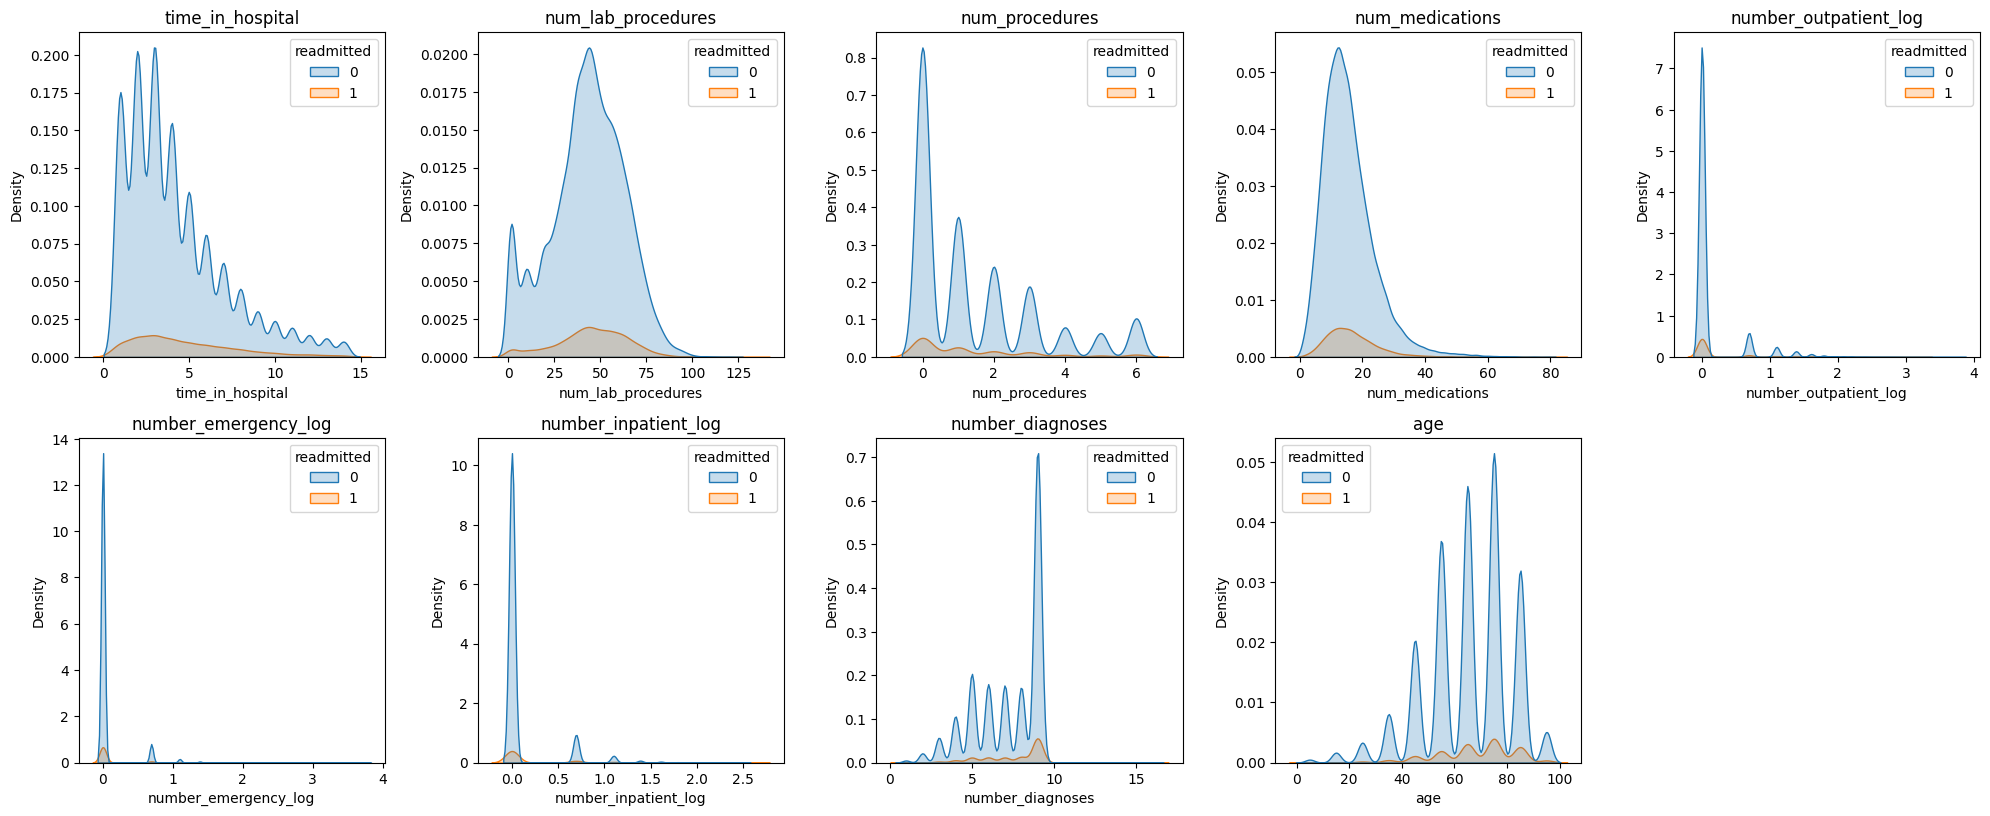

In [234]:
# Create numerical features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient_log', 'number_emergency_log',
                      'number_inpatient_log', 'number_diagnoses', 'age']

# Using kdeplot explore relationship between readmission and numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.kdeplot(x=feature, hue='readmitted', data=df, fill=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


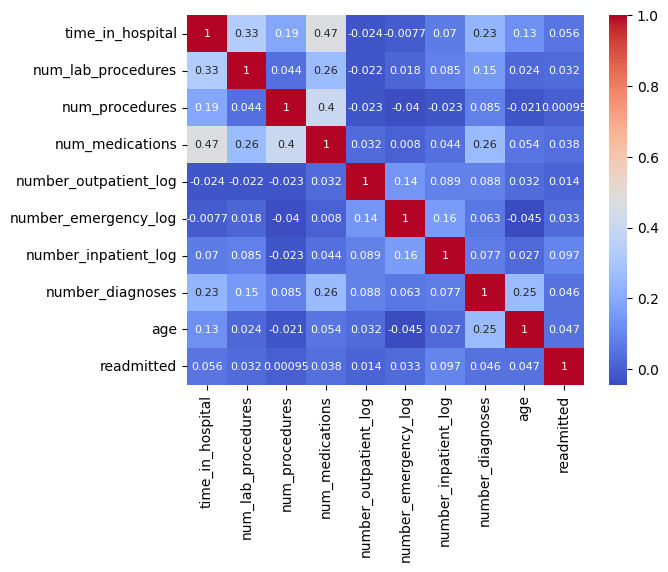

In [235]:
# Create a correlation matrix
corr_matrix = df[numerical_features + ['readmitted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.show()

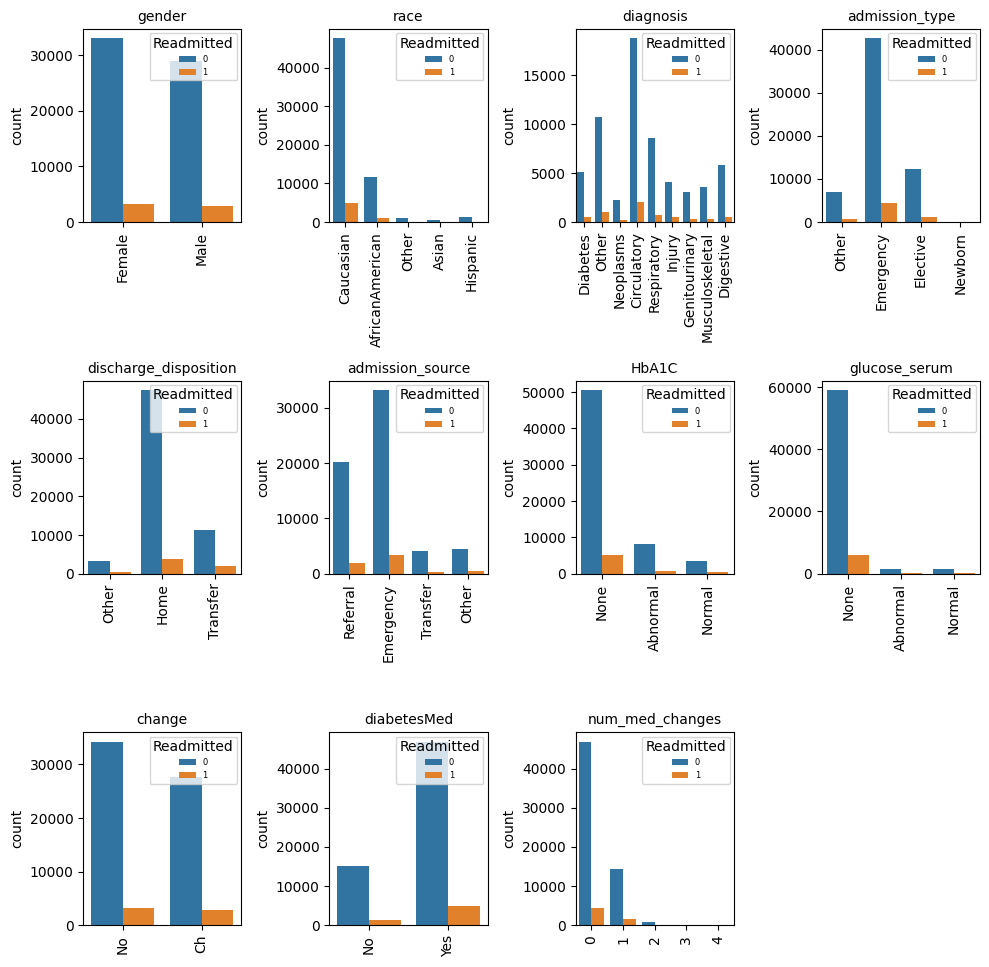

In [236]:
# Explore relationship between readmitted and non-numerical data

categorical_features = ['gender', 'race', 'diagnosis', 'admission_type', 'discharge_disposition', 'admission_source', 
                        'HbA1C', 'glucose_serum', 'change', 'diabetesMed', 'num_med_changes']

plt.figure(figsize=(10, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 4, i + 1)  # Increase the number of rows to make the charts smaller
    sns.countplot(x=feature, hue='readmitted', data=df)
    plt.title(feature, fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('')  # Remove the x axis title
    plt.legend(title='Readmitted', loc='upper right', fontsize=6)  # Make the legend smaller
plt.tight_layout()
plt.show()

### 4. Modeling


In [287]:
#Import all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.utils import resample
from category_encoders import BinaryEncoder

#### 4.1 Train-Test Split

In [392]:
## Create DataFrame for modeling
X = df.drop(columns=['readmitted', 'admission_source_id', 'discharge_disposition_id', 'admission_type_id',
                    'A1Cresult', 'max_glu_serum', 'diag_1', 'patient_nbr'], axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [393]:
# Encoding
medication_features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone', 'metformin-pioglitazone']
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient_log', 'number_emergency_log',
                      'number_inpatient_log', 'number_diagnoses', 'age', 'num_med_changes']
categorical_features = ['race','diagnosis', 'admission_type', 'discharge_disposition', 'admission_source', 
                        'HbA1C', 'glucose_serum'] + medication_features
binary_features = ['gender', 'change', 'diabetesMed']

# Transform categorical features into one-hot encoding
categorical_encoder = OneHotEncoder(handle_unknown='ignore')
    
# Transform numerical_geatures into standardization
numerical_encoder = StandardScaler()

# Tansform binary features into binary encoding
binary_encoder = BinaryEncoder()

preprocessor = ColumnTransformer(transformers=[('binary', binary_encoder, binary_features),
                                              ('categorical', categorical_encoder, categorical_features),
                                              ('numerical', numerical_encoder, numerical_features)])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

#### 4.2 SMOTE (Over-sampling techniques)
Since we have imbalanced data, we need to balance the data by over-sampling the minority class for training set.

In [394]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Assuming X_train_preprocessed and y_train are your features and target after preprocessing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Debugging: Check the shape of the resampled data
print(f"Original X_train shape: {X_train_preprocessed.shape}")
print(f"Resampled X_train shape: {X_resampled.shape}")
print(f"Original y_train distribution: {y_train.value_counts()}")
print(f"Resampled y_train distribution: {pd.Series(y_resampled).value_counts()}")


Original X_train shape: (54513, 110)
Resampled X_train shape: (99188, 110)
Original y_train distribution: readmitted
0    49594
1     4919
Name: count, dtype: int64
Resampled y_train distribution: readmitted
0    49594
1    49594
Name: count, dtype: int64


In [396]:
X_train = X_resampled
y_train = y_resampled

X_test = X_test_preprocessed
y_test = y_test

#### 4.3 Model training 
#### 4.3.1 Baseline model

__Model 1: Logistic Regression__

Logistic Regression: Model training   

In [397]:
# Train logistic regression model
log_model = LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42).fit(X_train, y_train)
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_test_preds = log_model.predict_proba(X_test)[:,1]

In [398]:
# Compare metrics between training and validation
thresh = 0.5
training_metrics = {
    "Accuracy": accuracy_score(y_train, (y_train_preds > thresh)),
    "Recall": recall_score(y_train, (y_train_preds > thresh)),
    "Precision": precision_score(y_train, (y_train_preds > thresh)),
    "F1 Score": f1_score(y_train, (y_train_preds > thresh)),
    "AUC": roc_auc_score(y_train, y_train_preds)
}

test_metrics = {
    "Accuracy": accuracy_score(y_test, (y_test_preds > thresh)),
    "Recall": recall_score(y_test, (y_test_preds > thresh)),
    "Precision": precision_score(y_test, (y_test_preds > thresh)),
    "F1 Score": f1_score(y_test, (y_test_preds > thresh)),
    "AUC": roc_auc_score(y_test, y_test_preds)
}

pd.DataFrame([training_metrics, test_metrics], index=["Training", "Test"])


,Accuracy,Recall,Precision,F1 Score,AUC
Training,0.615347,0.579445,0.624270,0.601023,0.661990
Test,0.640106,0.528455,0.130653,0.209508,0.623428


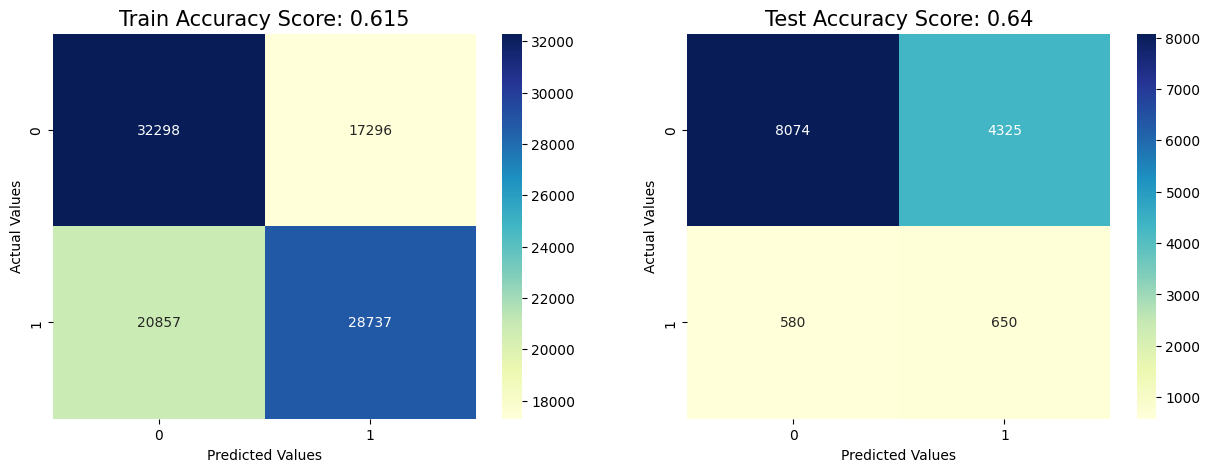

In [402]:
# Confusion Matrix

predictions = log_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = confusion_matrix(y_train, predictions)

predictions = log_model.predict(X_test)
test_score = round(accuracy_score(y_test, predictions), 3)
cm_test = confusion_matrix(y_test, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1, cmap="YlGnBu")
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_test, annot=True, fmt=".0f",ax=ax2, cmap="YlGnBu")
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Test Accuracy Score: {0}'.format(test_score), size = 15)
plt.show()

__Model 2: Random Forest__

In [401]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_split=5).fit(X_train, y_train)
y_train_preds = rf_model.predict_proba(X_train)[:,1]
y_val_preds = rf_model.predict_proba(X_test)[:,1]

In [431]:
# Compare metrics between training and validation
thresholds = np.arange(0, 1, 0.01)
f1_scores = [f1_score(y_test, y_test_preds > threshold) for threshold in thresholds]
thresh = thresholds[np.argmax(f1_scores)]
training_metrics = {
    "Accuracy": accuracy_score(y_train, (y_train_preds > thresh)),
    "Recall": recall_score(y_train, (y_train_preds > thresh)),
    "Precision": precision_score(y_train, (y_train_preds > thresh)),
    "F1 Score": f1_score(y_train, (y_train_preds > thresh)),
    "AUC": roc_auc_score(y_train, (y_train_preds > thresh))
}

test_metrics = {
    "Accuracy": accuracy_score(y_test, (y_test_preds > thresh)),
    "Recall": recall_score(y_test, (y_test_preds > thresh)),
    "Precision": precision_score(y_test, (y_test_preds > thresh)),
    "F1 Score": f1_score(y_test, (y_test_preds > thresh)),
    "AUC": roc_auc_score(y_test, (y_test_preds > thresh))
}

pd.DataFrame([training_metrics, test_metrics], index=["Training", "Test"])

,Accuracy,Recall,Precision,F1 Score,AUC
Training,0.847885,0.949228,0.789257,0.861882,0.847885
Test,0.708783,0.435772,0.140645,0.212656,0.585819


<Figure size 1500x500 with 0 Axes>

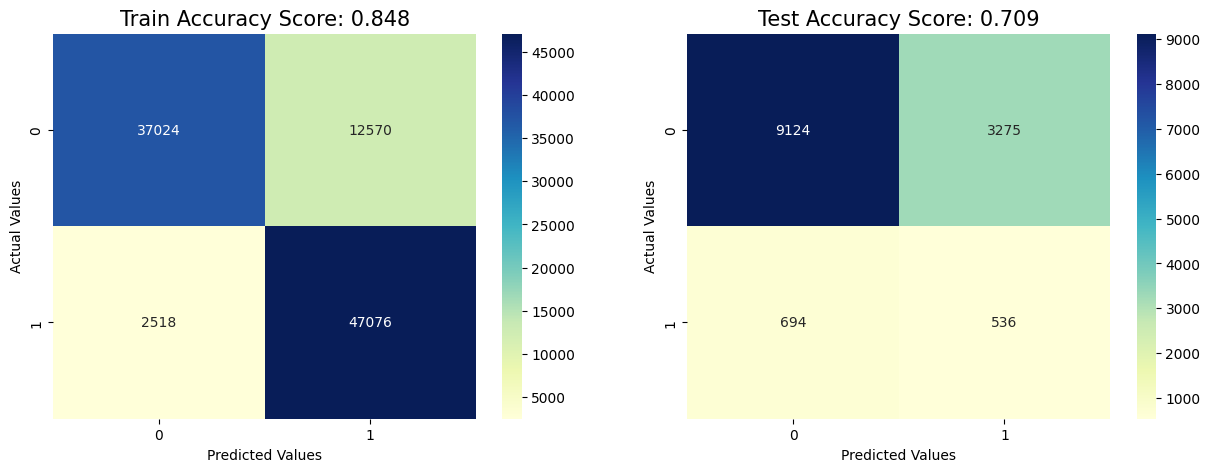

In [432]:
# Confusion Matrix
train_score = round(accuracy_score(y_train, (y_train_preds > thresh)), 3)
cm_train = confusion_matrix(y_train, (y_train_preds > thresh))

test_score = round(accuracy_score(y_test, (y_test_preds > thresh)), 3)
cm_test = confusion_matrix(y_test, (y_test_preds > thresh))

plt.figure(figsize=(15,5))
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1, cmap="YlGnBu")
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_test, annot=True, fmt=".0f",ax=ax2, cmap="YlGnBu")
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Test Accuracy Score: {0}'.format(test_score), size = 15)
plt.show()

__Model 3: XGBoost__

In [406]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_depth=5, min_child_weight=1).fit(X_train, y_train)
y_train_preds = xgb_model.predict_proba(X_train)[:,1]
y_test_preds = xgb_model.predict_proba(X_test)[:,1]

In [436]:
# Compare metrics between training and validation
thresholds = np.arange(0, 1, 0.01)
f1_scores = [f1_score(y_test, y_test_preds > threshold) for threshold in thresholds]
thresh = thresholds[np.argmax(f1_scores)]

training_metrics = {
    "Accuracy": accuracy_score(y_train, (y_train_preds > thresh)),
    "Recall": recall_score(y_train, (y_train_preds > thresh)),
    "Precision": precision_score(y_train, (y_train_preds > thresh)),
    "F1 Score": f1_score(y_train, (y_train_preds > thresh)),
    "AUC": roc_auc_score(y_train, (y_train_preds > thresh))
}

test_metrics = {
    "Accuracy": accuracy_score(y_test, (y_test_preds > thresh)),
    "Recall": recall_score(y_test, (y_test_preds > thresh)),
    "Precision": precision_score(y_test, (y_test_preds > thresh)),
    "F1 Score": f1_score(y_test, (y_test_preds > thresh)),
    "AUC": roc_auc_score(y_test, (y_test_preds > thresh))
}
pd.DataFrame([training_metrics, test_metrics], index=["Training", "Test"])

,Accuracy,Recall,Precision,F1 Score,AUC
Training,0.847885,0.949228,0.789257,0.861882,0.847885
Test,0.708783,0.435772,0.140645,0.212656,0.585819


<Figure size 1500x500 with 0 Axes>

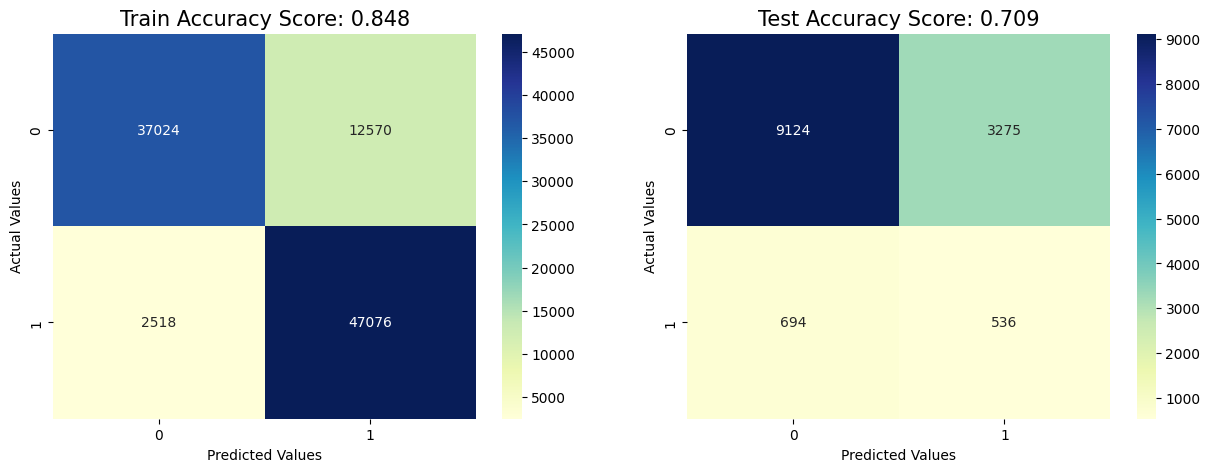

In [435]:
# Confusion Matrix
train_score = round(accuracy_score(y_train, (y_train_preds > thresh)), 3)
cm_train = confusion_matrix(y_train, (y_train_preds > thresh))

test_score = round(accuracy_score(y_test, (y_test_preds > thresh)), 3)
cm_test = confusion_matrix(y_test, (y_test_preds > thresh))

# Plot confusion matrix
plt.figure(figsize=(15,5))
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1, cmap="YlGnBu")
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_test, annot=True, fmt=".0f",ax=ax2, cmap="YlGnBu")
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Test Accuracy Score: {0}'.format(test_score), size = 15)
plt.show()

__Model 4: LightGBM__

In [427]:
# Train LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42, max_depth=5,
                            min_child_weight=1, is_unbalance=True).fit(X_train, y_train)
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_test_preds = lgbm_model.predict_proba(X_test)[:,1]

[LightGBM] [Info] Number of positive: 49594, number of negative: 49594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19271
[LightGBM] [Info] Number of data points in the train set: 99188, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [437]:
# Compare metrics between training and validation
thresholds = np.arange(0, 1, 0.01)
f1_scores = [f1_score(y_test, y_test_preds > threshold) for threshold in thresholds]
thresh = thresholds[np.argmax(f1_scores)]

training_metrics = {
    "Accuracy": accuracy_score(y_train, (y_train_preds > thresh)),
    "Recall": recall_score(y_train, (y_train_preds > thresh)),
    "Precision": precision_score(y_train, (y_train_preds > thresh)),
    "F1 Score": f1_score(y_train, (y_train_preds > thresh)),
    "AUC": roc_auc_score(y_train, (y_train_preds > thresh))
}

test_metrics = {
    "Accuracy": accuracy_score(y_test, (y_test_preds > thresh)),
    "Recall": recall_score(y_test, (y_test_preds > thresh)),
    "Precision": precision_score(y_test, (y_test_preds > thresh)),
    "F1 Score": f1_score(y_test, (y_test_preds > thresh)),
    "AUC": roc_auc_score(y_test, (y_test_preds > thresh))
}
pd.DataFrame([training_metrics, test_metrics], index=["Training", "Test"])

,Accuracy,Recall,Precision,F1 Score,AUC
Training,0.847885,0.949228,0.789257,0.861882,0.847885
Test,0.708783,0.435772,0.140645,0.212656,0.585819


<Figure size 1500x500 with 0 Axes>

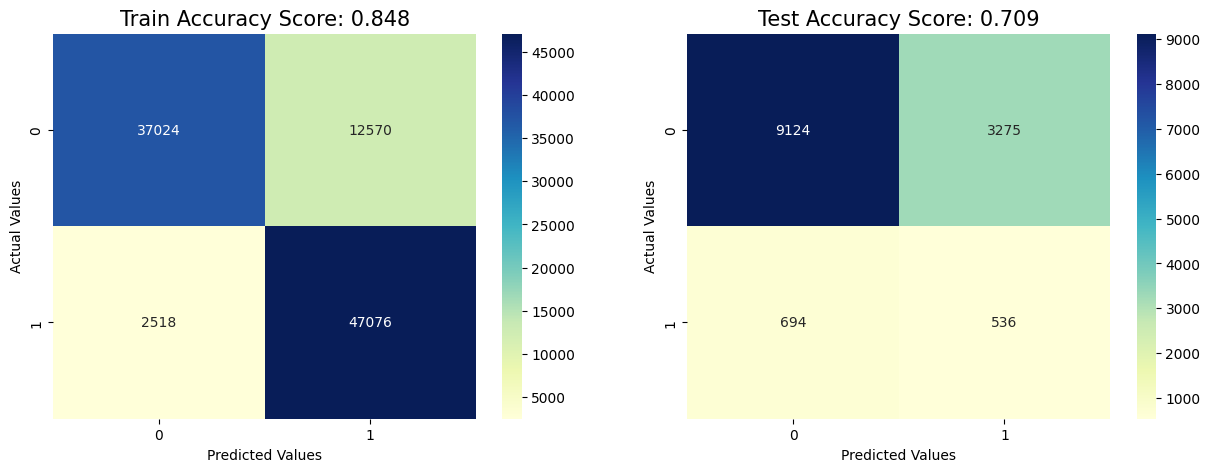

In [438]:
# Confusion Matrix
train_score = round(accuracy_score(y_train, (y_train_preds > thresh)), 3)
cm_train = confusion_matrix(y_train, (y_train_preds > thresh))

test_score = round(accuracy_score(y_test, (y_test_preds > thresh)), 3)
cm_test = confusion_matrix(y_test, (y_test_preds > thresh))

plt.figure(figsize=(15,5))
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1, cmap="YlGnBu")
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_test, annot=True, fmt=".0f",ax=ax2, cmap="YlGnBu")
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Test Accuracy Score: {0}'.format(test_score), size = 15)
plt.show()

__Model 5: CatBoost__   

In [417]:
 # Train CatBoost model
cat_model = CatBoostClassifier(n_estimators=100, random_state=42, max_depth=5).fit(X_train, y_train)
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_test_preds = cat_model.predict_proba(X_test)[:,1]

Learning rate set to 0.5
0:	learn: 0.5934989	total: 94.2ms	remaining: 9.32s
1:	learn: 0.4881527	total: 144ms	remaining: 7.04s
2:	learn: 0.4058433	total: 182ms	remaining: 5.87s
3:	learn: 0.3408818	total: 205ms	remaining: 4.92s
4:	learn: 0.2954909	total: 229ms	remaining: 4.35s
5:	learn: 0.2729467	total: 251ms	remaining: 3.93s
6:	learn: 0.2433400	total: 276ms	remaining: 3.67s
7:	learn: 0.2236130	total: 301ms	remaining: 3.46s
8:	learn: 0.2076278	total: 324ms	remaining: 3.27s
9:	learn: 0.2035515	total: 341ms	remaining: 3.07s
10:	learn: 0.2017338	total: 361ms	remaining: 2.92s
11:	learn: 0.1975829	total: 383ms	remaining: 2.81s
12:	learn: 0.1943649	total: 415ms	remaining: 2.78s
13:	learn: 0.1925997	total: 448ms	remaining: 2.75s
14:	learn: 0.1918894	total: 471ms	remaining: 2.67s
15:	learn: 0.1862959	total: 504ms	remaining: 2.65s
16:	learn: 0.1850254	total: 532ms	remaining: 2.6s
17:	learn: 0.1836036	total: 557ms	remaining: 2.54s
18:	learn: 0.1830611	total: 575ms	remaining: 2.45s
19:	learn: 0.182

In [419]:
# Compare metrics between training and validation
thresholds = np.arange(0, 1, 0.01)
f1_scores = [f1_score(y_test, y_test_preds > threshold) for threshold in thresholds]
thresh = thresholds[np.argmax(f1_scores)]

training_metrics = {
    "Accuracy": accuracy_score(y_train, (y_train_preds > thresh)),
    "Recall": recall_score(y_train, (y_train_preds > thresh)),
    "Precision": precision_score(y_train, (y_train_preds > thresh)),
    "F1 Score": f1_score(y_train, (y_train_preds > thresh)),
    "AUC": roc_auc_score(y_train, (y_train_preds > thresh))
}

test_metrics = {
    "Accuracy": accuracy_score(y_test, (y_test_preds > thresh)),
    "Recall": recall_score(y_test, (y_test_preds > thresh)),
    "Precision": precision_score(y_test, (y_test_preds > thresh)),
    "F1 Score": f1_score(y_test, (y_test_preds > thresh)),
    "AUC": roc_auc_score(y_test, (y_test_preds > thresh))
}
pd.DataFrame([training_metrics, test_metrics], index=["Training", "Test"])

,Accuracy,Recall,Precision,F1 Score,AUC
Training,0.885208,0.947030,0.842820,0.891891,0.885208
Test,0.769315,0.356911,0.157235,0.218299,0.583569
